In [57]:
from keras import layers
from keras import models

In [58]:
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [59]:
from keras import optimizers

In [60]:
from keras import optimizers

model.compile(optimizer=optimizers.legacy.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [62]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [63]:
word_index = imdb.get_word_index()
reversed_word_index = dict([value,key] for (key,value) in word_index.items())
decode_review = " ".join([reversed_word_index.get(i - 3, "?") for i in train_data[0]])
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [64]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [65]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [66]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [67]:
partial_x_train.shape

(15000, 10000)

In [68]:
partial_y_train.shape

(15000,)

In [69]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)
                    )

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5364 - accuracy: 0.7608 - val_loss: 0.4295 - val_accuracy: 0.8262
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3166 - accuracy: 0.9001 - val_loss: 0.3113 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2331 - accuracy: 0.9223 - val_loss: 0.2819 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1828 - accuracy: 0.9413 - val_loss: 0.2789 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1485 - accuracy: 0.9541 - val_loss: 0.2781 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1210 - accuracy: 0.9624 - val_loss: 0.3033 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0967 - accuracy: 0.9721 - val_loss: 0.3070 - val_accuracy: 0.8848
Epoch 8/20
30/

In [14]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 0s 437us/step - loss: 0.5924 - accuracy: 0.8574


[0.5924395322799683, 0.8574000000953674]

In [70]:
history_dict = history.history
history_dict.keys()
history_dict["val_accuracy"]

[0.826200008392334,
 0.8863000273704529,
 0.8895000219345093,
 0.8892999887466431,
 0.8884000182151794,
 0.8833000063896179,
 0.8848000168800354,
 0.8831999897956848,
 0.8808000087738037,
 0.8784000277519226,
 0.8772000074386597,
 0.8756999969482422,
 0.8751999735832214,
 0.8738999962806702,
 0.8708999752998352,
 0.8711000084877014,
 0.8712000250816345,
 0.8684999942779541,
 0.8684999942779541,
 0.8676999807357788]

In [71]:
import matplotlib.pyplot as plt



accuracy = history_dict["accuracy"]
loss = history_dict["loss"]

validation_loss = history_dict["val_loss"]
validation_accuracy = history_dict["val_accuracy"]

epochs = range(1, len(accuracy) + 1)


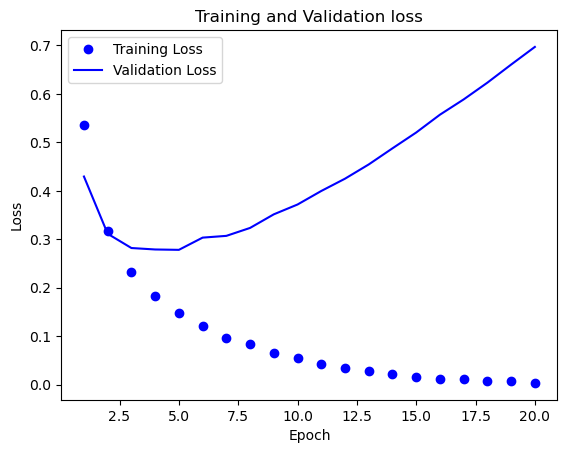

In [72]:
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, validation_loss, "b", label = "Validation Loss")
plt.title("Training and Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

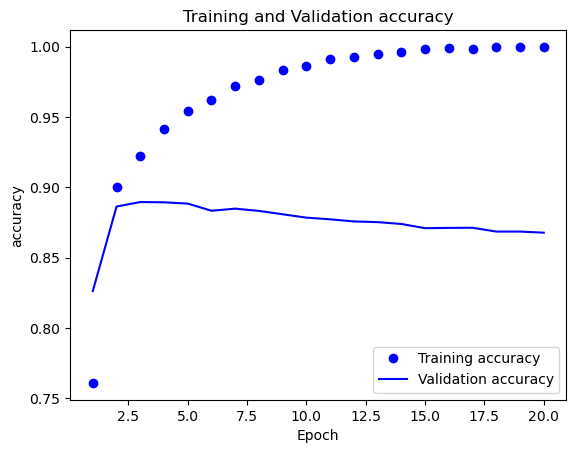

In [73]:
plt.plot(epochs, accuracy, "bo", label = "Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label = "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [74]:
model.predict(x_test).shape

782/782 [==============================] - 0s 409us/step


(25000, 1)

In [75]:
predict_content = "The film is just amzaing and I really enjoy this"

In [76]:
predict_sequence = []
for i in predict_content.split(" "):
    predict_sequence.append(word_index.get(i, 0) + 3)

In [77]:
predict_sequence

[3, 22, 9, 43, 3, 5, 3, 66, 358, 14]

In [78]:
vectorized_predict_sequence = vectorize_sequences(predict_sequence)
vectorized_predict_sequence

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
result = model.predict(vectorized_predict_sequence)

1/1 [==============================] - 0s 16ms/step


In [80]:
def word_to_sequence(content):
    predict_sequence = []
    for i in content.split(" "):
        predict_sequence.append(word_index.get(i, 0) + 3)
    return [predict_sequence]

In [81]:
def vectorize_sequences_by_index(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [82]:
def predict_sequence(sequence):
    result = model.predict(sequence)
    print(result)
    if result[0,0] >= 0.70:
        print("Really Positive")
    
    elif result[0,0] >= 0.6:
        print("Probably Positive")
    
    elif result[0,0] >= 0.51:
        print("Slightly Positive")
    
    elif result[0,0] >= 0.4:
        print("Slightly Negetive")
    
    elif result[0,0] >= 0.3:
        print("Probably Negetive")
    
    else:
        print("Really Negetive")
        

In [83]:
def predict_content(content):
    sequence = word_to_sequence(content)
    vectorized_sequence = vectorize_sequences_by_index(sequence)
    predict_sequence(vectorized_sequence)

In [85]:
content = input()
predict_content(content)

This is the worst movie I have ever seen
1/1 [==============================] - 0s 61ms/step
[[0.09116559]]
Really Negetive
